<a href="https://colab.research.google.com/github/SHAZAN01/Spam_email_Detection/blob/main/Spam_Detection_email.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Project- Spam Detection of Email

In [ ]:
# Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
%matplotlib inline
sns.set_style('whitegrid')

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

In [ ]:
import plotly.express as px

Exploratory Data Analysis

In [ ]:
email_df = pd.read_csv('/content/sample_data/email.csv')

In [ ]:
email_df.head()

,Label,Mail
0,Ham,"Go until jurong point, crazy.. Available only ..."
1,Ham,Ok lar... Joking wif u oni...
2,Spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,Ham,U dun say so early hor... U c already then say...
4,Ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
# Getting the information about the dataset
email_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10743 entries, 0 to 10742
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Label   10743 non-null  object
 1   Mail    10743 non-null  object
dtypes: object(2)
memory usage: 168.0+ KB


In [ ]:
#Checking for duplicates
email_df.loc[email_df.duplicated()]

,Label,Mail
103,Ham,As per your request 'Melle Melle (Oru Minnamin...
154,Ham,As per your request 'Melle Melle (Oru Minnamin...
207,Ham,"As I entered my cabin my PA said, '' Happy B'd..."
223,Ham,"Sorry, I'll call later"
326,Ham,No calls..messages..missed calls
...,...,...
10633,Ham,Subject: tenaska iv\nbob :\ni understand from ...
10636,Spam,Subject: \nthis week only : f . ree gen . erlc...
10661,Spam,Subject: \nthe permanent fix to penis growth\n...
10727,Ham,"Subject: cleburne - tenaska iv plant\ndaren ,\..."


In [ ]:
#dropping duplicated rows
email_df.drop_duplicates();

In [ ]:
email_df.isnull().sum()

Label    0
Mail     0
dtype: int64

[Text(0.5, 1.0, 'A countplot of spam and ham categories')]

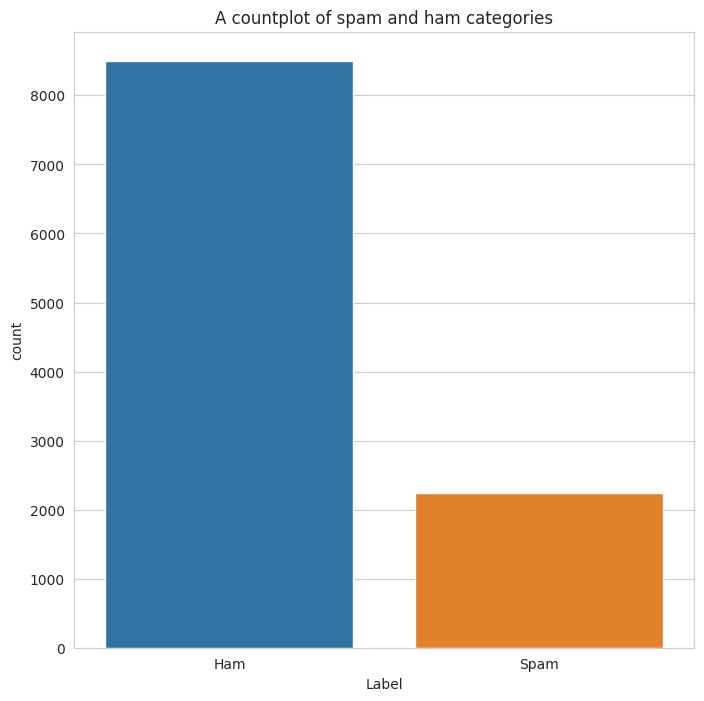

In [ ]:
#Visualizing Number of Spam Messages and Ham
plt.figure(figsize=(8,8))
sns.countplot(x = 'Label', data = email_df).set(title = 'A countplot of spam and ham categories')

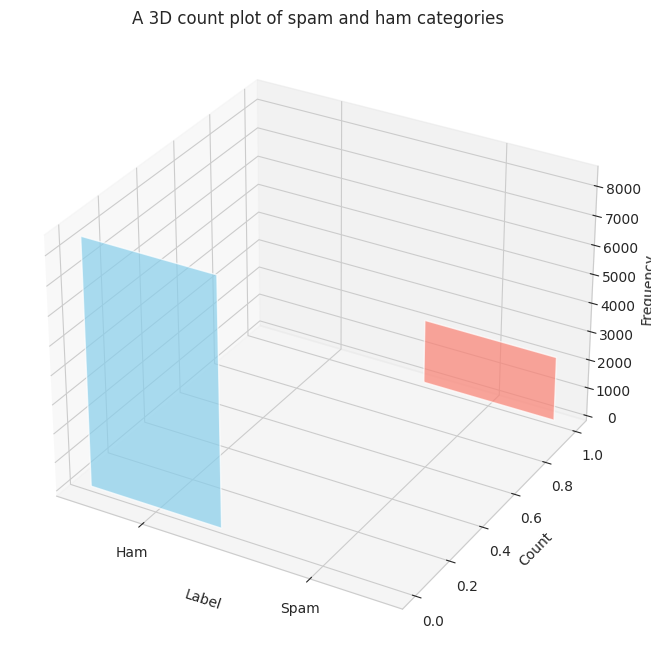

In [ ]:
# Create a new figure and a 3D subplot
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

# Replace 'Label' and 'email_df' with your actual column name and DataFrame
sns_counts = email_df['Label'].value_counts()

# Get the unique categories and their counts
categories = sns_counts.index
counts = sns_counts.values

# Generate colors for the bars (optional)
colors = ['skyblue', 'salmon']

# Plot the bars in 3D
for i, category in enumerate(categories):
    ax.bar(category, counts[i], zs=i, zdir='y', color=colors[i], alpha=0.7)

# Set labels and title
ax.set_xlabel('Label')
ax.set_ylabel('Count')
ax.set_zlabel('Frequency')
ax.set_title('A 3D count plot of spam and ham categories')

# Show the plot
plt.show()

Preparing Data For the model

In [ ]:
# Separating data into dependent and independent variables
X = email_df['Mail']
y = email_df['Label']

In [ ]:
# Encoding the spam or ham to numerical forms
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

In [ ]:
X = np.array(X, dtype=str)
feature_extraction = TfidfVectorizer(min_df=1, stop_words='english', lowercase=True)
X = feature_extraction.fit_transform(X)

In [ ]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

Training Models on the data

In [ ]:
# Using Support Vector Machine as the first Model
model_1 = SVC()

In [ ]:
model_1.fit(X_train, y_train)

SVC()

In [ ]:
prediction = model_1.predict(X_test)

In [ ]:
print('Confusion matrix: ', '\n', confusion_matrix(prediction,y_test))
print('Accuracy score: ', accuracy_score(prediction,y_test))
print(classification_report(prediction,y_test))

Confusion matrix:  
 [[2562  167]
 [   6  488]]
Accuracy score:  0.9463233012721067
              precision    recall  f1-score   support

           0       1.00      0.94      0.97      2729
           1       0.75      0.99      0.85       494

    accuracy                           0.95      3223
   macro avg       0.87      0.96      0.91      3223
weighted avg       0.96      0.95      0.95      3223



In [ ]:
import plotly.graph_objects as go

In [ ]:
#Using Naive bayes
model_2 = MultinomialNB()

In [ ]:
model_2.fit(X_train,y_train)

MultinomialNB()

In [ ]:
prediction1 = model_2.predict(X_test)

In [ ]:
print('Confusion matrix: ', '\n', confusion_matrix(prediction1,y_test))
print('Accuracy score: ', accuracy_score(prediction1,y_test))
print(classification_report(prediction1,y_test))

Confusion matrix:  
 [[2566  324]
 [   2  331]]
Accuracy score:  0.8988520012410798
              precision    recall  f1-score   support

           0       1.00      0.89      0.94      2890
           1       0.51      0.99      0.67       333

    accuracy                           0.90      3223
   macro avg       0.75      0.94      0.81      3223
weighted avg       0.95      0.90      0.91      3223



In [ ]:
#Using Random Forest Classifier
model_3 = RandomForestClassifier()

In [ ]:
model_3.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
prediction2=model_3.predict(X_test)

In [ ]:
print('Confusion matrix: ', '\n', confusion_matrix(prediction2,y_test))
print('Accuracy score: ', accuracy_score(prediction2,y_test))
print(classification_report(prediction2,y_test))

Confusion matrix:  
 [[2560  141]
 [   8  514]]
Accuracy score:  0.9537697797083463
              precision    recall  f1-score   support

           0       1.00      0.95      0.97      2701
           1       0.78      0.98      0.87       522

    accuracy                           0.95      3223
   macro avg       0.89      0.97      0.92      3223
weighted avg       0.96      0.95      0.96      3223



In [ ]:
#Using Logistic Regression
model_4 = LogisticRegression()

In [ ]:
model_4.fit(X_train,y_train)

LogisticRegression()

In [ ]:
prediction3 = model_4.predict(X_test)

In [ ]:
print('Confusion matrix: ', '\n', confusion_matrix(prediction3,y_test))
print('Accuracy score: ', accuracy_score(prediction3,y_test))
print(classification_report(prediction3,y_test))

Confusion matrix:  
 [[2560  214]
 [   8  441]]
Accuracy score:  0.9311200744647844
              precision    recall  f1-score   support

           0       1.00      0.92      0.96      2774
           1       0.67      0.98      0.80       449

    accuracy                           0.93      3223
   macro avg       0.84      0.95      0.88      3223
weighted avg       0.95      0.93      0.94      3223



Using all the models to predict some message:
For the prediction, 0 represents not spam and 1 represents spam




In [ ]:
message = ["Hi Festus Anyan,Your UCC E-learning | University of Cape Coast account was just signed in to from a new device."
           "Your account: ps/itc/20/0058 festus.anyan@stu.ucc.edu.ghThursday, 13 July 2023, 2:18 AMDevice: Mozilla/5.0"
          "(Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/114.0.0.0 Safari/537.36IP: 154.160.22.180"
           "If this was you, then you don't need to do anything."
           "If you don't recognise this activity, please change your password."]
message = feature_extraction.transform(message)

In [ ]:
model_1.predict(message)

array([0])

In [ ]:
model_2.predict(message)

array([0])

In [ ]:
model_3.predict(message)

array([0])

In [ ]:
model_4.predict(message)

array([0])

In [ ]:
message = ["Hi Anyan Festus ,"
"We are excited to inform you that you can now get 8 Continuing Education Units (CEUs) by completing the Data Science and Machine Learning program from MIT IDSS."
"A CEU is a recognized measure used to determine the time spent in learning during professional development and training programs."
"Many employers, licensing agencies, and professional associations accept CEUs as evidence of a participant’s serious commitment to developing professional competence."
"So, don't wait any longer and begin your learning journey today!"
"For any follow-up questions about the CEUs or the program, please reply to this email or schedule a call with your program advisor from Great Learning."]


In [ ]:
message = feature_extraction.transform(message)

In [ ]:
model_1.predict(message)

array([0])

In [ ]:
model_2.predict(message)

array([0])

In [ ]:
model_3.predict(message)

array([0])

In [ ]:
model_4.predict(message)

array([0])

In [ ]:
c1=confusion_matrix(prediction,y_test)
c2=confusion_matrix(prediction1,y_test)
c3=confusion_matrix(prediction2,y_test)
c4=confusion_matrix(prediction3,y_test)

In [ ]:
# Replace these values with your actual evaluation results
models = ['SVM', 'Naive Bayes', 'Random Forrest', 'Logistic Regression']
accuracy_scores = [0.94, 0.89, 0.95, 0.93]  # Replace with your accuracy scores
confusion_matrices = [c1, c2, c3, c4]  # Replace with your confusion matrices

# Create the DataFrame
data = {'Model': models, 'Accuracy': accuracy_scores, 'Confusion Matrix': confusion_matrices}
df = pd.DataFrame(data)


In [ ]:
df

,Model,Accuracy,Confusion Matrix
0,SVM,0.94,"[[2566, 324], [2, 331]]"
1,Naive Bayes,0.89,"[[2566, 324], [2, 331]]"
2,Random Forrest,0.95,"[[2560, 141], [8, 514]]"
3,Logistic Regression,0.93,"[[2560, 214], [8, 441]]"


In [ ]:
# Set the color palette for the box plot
colors = ['#ffffd4', '#fe9929', '#a6cee3', '#1f78b4']

# Create the box plot
fig = px.box(df, y='Accuracy', x='Model', color='Model',
             color_discrete_sequence=colors,
             points='all',
             title='Model Comparison - Accuracy Scores',
             labels={'Accuracy': 'Accuracy Score', 'Model': 'Model Name'})

# Set the template to 'plotly_dark' for dark background
fig.update_layout(template='plotly_dark')

# Show the plot
fig.show()


So given the first two messages, all models have been able to tell that the messages are not spam messages

The message below was copied from my spam messages and fitted on all four models. Below are the predictions made by all models

1.Three models 1,3 and 4 predicted correctly by saying the message is spam and model two predicted that it is not spam1.

In [ ]:
message = ["Since you are on our Preferred Subscriber List, we are giving you an EXTRA discount not available to everyone else."
           "This is because you are a loyal subscriber (BIG THANK YOU!)"
            "So please read carefully below, and then make sure you type the code FOREVER at checkout for an additional discount."
           " Retail value: $397"
            "Your special price today: only $69"
            "Please use this coupon code: FOREVER"
            "This is our LOWEST.  PRICE.  EVER."
            "BAD NEWS: This private offer expires in a few hours."]
message = feature_extraction.transform(message)

In [ ]:
model_1.predict(message)

array([1])

In [ ]:
model_2.predict(message)

array([0])

In [ ]:
model_3.predict(message)

array([1])

In [ ]:
model_4.predict(message)

array([1])